# Global Terrorism (1970 - 2015)

In [1]:
!pip install basemap basemap-data-hires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

try:
    t_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-collection-final/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
t_file = t_file[np.isfinite(t_file.latitude)]

In [4]:
t_file.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
regions = list(set(t_file.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightsage', 'lightgray', 'navy']

ValueError: 'lightsage' is not a valid value for color

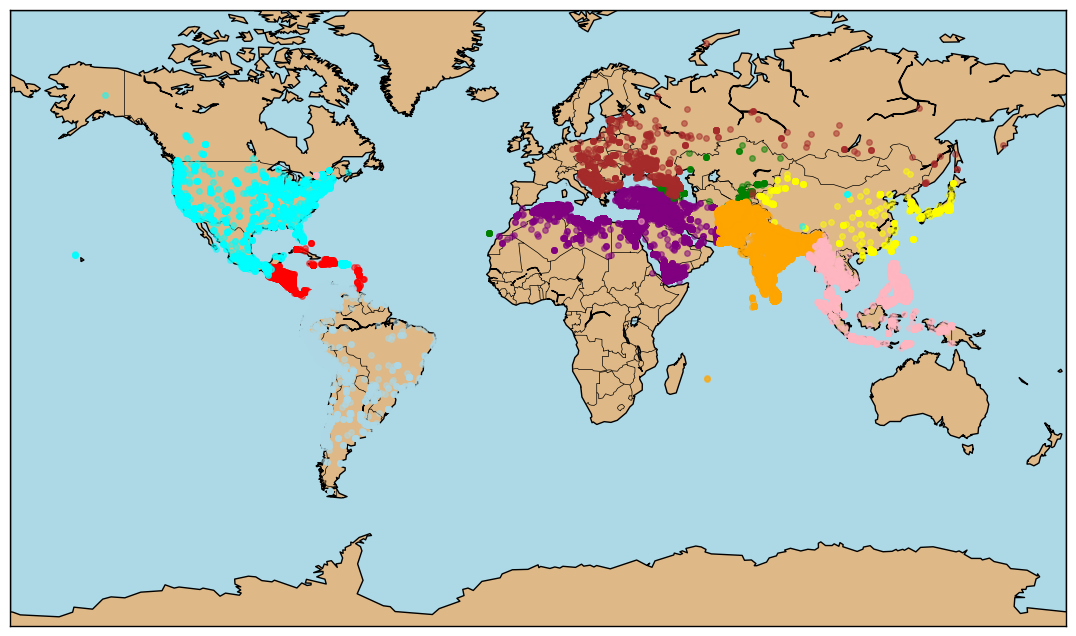

In [6]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(t_file.longitude[t_file.region_txt == region].astype("float")),\
            (list(t_file.latitude[t_file.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)

plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()

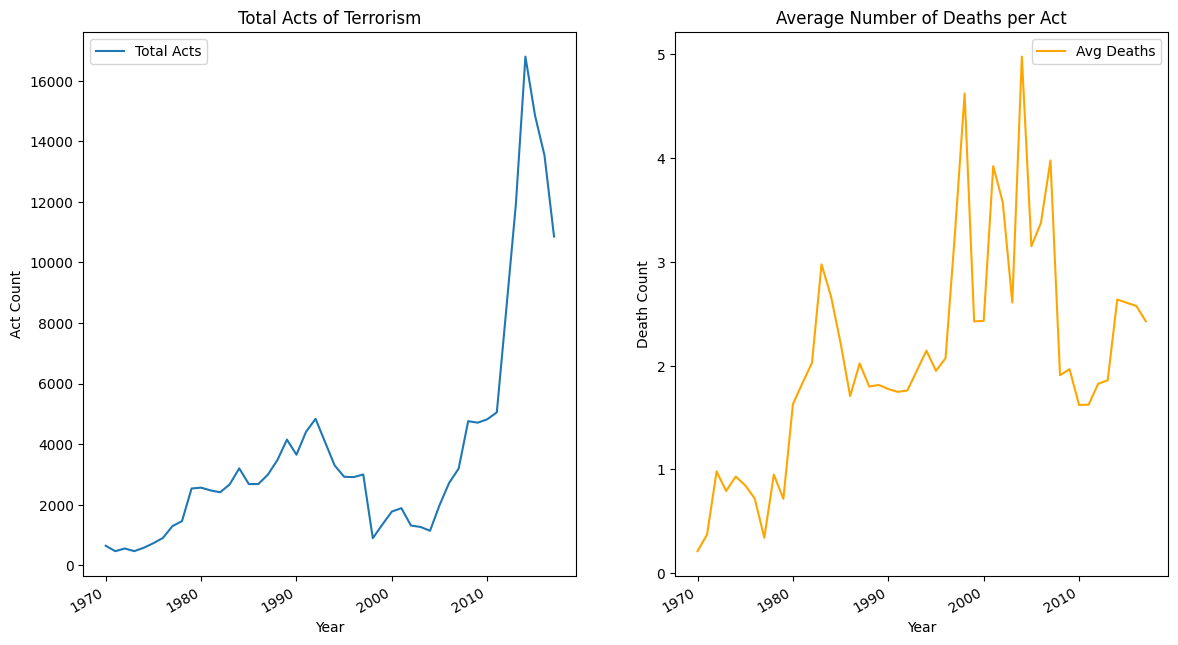

In [10]:
t_file['nkill'] = pd.to_numeric(t_file['nkill'], errors='coerce')
t_file['eventid'] = pd.to_numeric(t_file['eventid'], errors='coerce')
t_file['iyear'] = pd.to_numeric(t_file['iyear'], errors='coerce')

t_file = t_file.dropna(subset=['iyear', 'eventid', 'nkill'])

count_year = t_file.groupby(['iyear'])['eventid'].count()
mean_year = t_file.groupby(['iyear'])['nkill'].mean()

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set(title='Total Acts of Terrorism', ylabel='Act Count', xlabel='Year')
ax1.plot(count_year.index, count_year, label='Total Acts')
ax1.legend()

ax2.set(title='Average Number of Deaths per Act', ylabel='Death Count', xlabel='Year')
ax2.plot(mean_year.index, mean_year, color='orange', label='Avg Deaths')
ax2.legend()

fig.autofmt_xdate()
plt.show()

In [11]:
region_mean_kills = []
for region in regions:
    region_mean_kills.append(t_file.nkill[t_file.region_txt == region].mean())

print('Average number of people killed per attack by Region\n')
for i, region in enumerate(regions):
    print('{}:{}'.format(region, round(region_mean_kills[i],2)))

Average number of people killed per attack by Region

East Asia:1.44
Central America & Caribbean:2.64
South America:1.45
Middle East & North Africa:2.72
Central Asia:1.66
South Asia:2.24
Eastern Europe:1.44
North America:1.42
Southeast Asia:1.15
Australasia & Oceania:0.54
Sub-Saharan Africa:4.41
Western Europe:0.4


In [12]:
def mapmean(row):
    for i, region in enumerate(regions):
        return region_mean_kills[i]

In [13]:
t_file['region_mean'] = t_file.apply(mapmean, axis = 1)
t_file['nkill-mean'] = t_file['nkill'] - t_file['region_mean']
t_file['absnkill-mean'] = abs(t_file['nkill-mean'])

In [14]:
def get_points(year, region = regions):
    points = t_file[['iyear', 'latitude', 'longitude', 'nkill', 'region_mean', 'nkill-mean', 'absnkill-mean']][t_file.iyear == year]
    return(points)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import animation

# Replace this with your actual function or data source
def get_points(year):
    # Example implementation: replace with actual data fetching logic
    data = {
        'latitude': np.random.uniform(-80, 80, 50),
        'longitude': np.random.uniform(-180, 180, 50),
        'nkill-mean': np.random.uniform(0, 50, 50),
        'absnkill-mean': np.abs(np.random.uniform(0, 50, 50))
    }
    return pd.DataFrame(data)

fig = plt.figure(figsize=(10, 10))
fig.text(0.8, 0.3, 'R. Troncoso', ha='right')
fig.suptitle('Global Terrorism (1970 - 2015)')
cmap = plt.get_cmap('coolwarm')

m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood', lake_color='lightblue', zorder=1)
m.drawmapboundary(fill_color='lightblue')

START_YEAR = 1970
LAST_YEAR = 2015

points = get_points(START_YEAR)
x, y = m(list(points['longitude']), list(points['latitude']))
scat = m.scatter(x, y, s=points['absnkill-mean']*2, marker='o',
                 alpha=0.3, zorder=10, c=points['nkill-mean'], cmap=cmap)
year_text = plt.text(-170, 80, str(START_YEAR), fontsize=15)
plt.close()


def update(frame_number):
    current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
    points = get_points(current_year)
    x, y = m(list(points['longitude']), list(points['latitude']))
    scat.set_offsets(np.c_[x, y])  # Correct shape for scatter plot
    scat.set_array(np.array(points['nkill-mean']))  # Update color
    scat.set_sizes(points['absnkill-mean']*1.5)  # Update size
    year_text.set_text(str(current_year))


ani = animation.FuncAnimation(fig, update, interval=750, frames=LAST_YEAR - START_YEAR + 1)
ani.save('animation.gif', writer='pillow', fps=2)


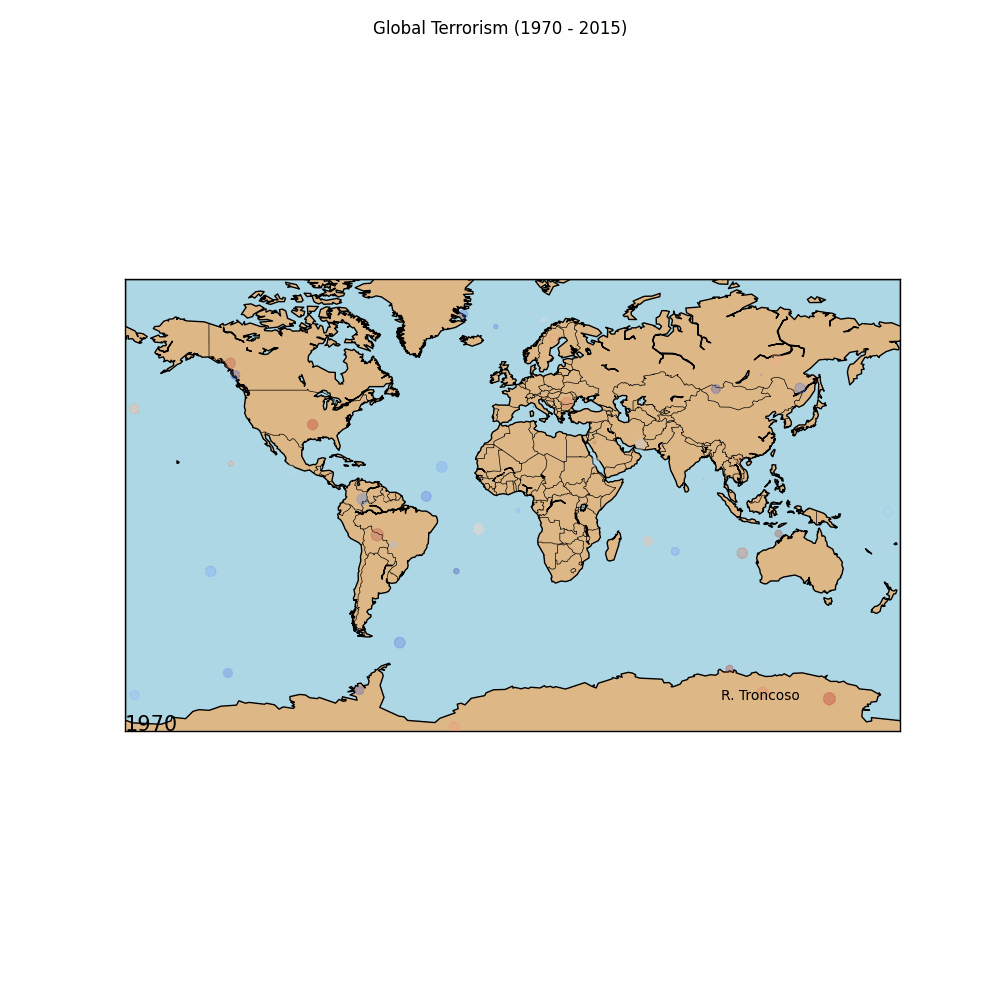

In [18]:
import io
import base64

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [21]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-collection-final/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [23]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [24]:
data.head(7)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [26]:
ndata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-collection-final/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1',usecols=[0, 1, 2, 3, 7, 8, 12, 13, 14, 25, 26, 27, 28, 29, 34, 35, 36, 37, 38, 83, 84, 98, 101])

In [27]:
ndata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt', 'city',
       'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'weapsubtype1',
       'weapsubtype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [28]:
turdata = ndata[ndata.country_txt == "Turkey"]

In [29]:
turdata.head()

,eventid,iyear,imonth,iday,country,country_txt,city,latitude,longitude,multiple,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,weapsubtype1,weapsubtype1_txt,nkill,nwound
226,197004250001,1970,4,25,209,Turkey,Istanbul,41.106178,28.689863,0.0,...,Bombing/Explosion,6,Airports & Aircraft,43.0,Airline Officer/Personnel,NaN,16.0,Unknown Explosive Type,0.0,0.0
486,197008310001,1970,8,31,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Bombing/Explosion,4,Military,29.0,Military Unit/Patrol/Convoy,NaN,16.0,Unknown Explosive Type,0.0,0.0
531,197010020002,1970,10,2,209,Turkey,Izmir,38.395649,27.135641,0.0,...,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,28.0,Dynamite/TNT,0.0,0.0
534,197010030001,1970,10,3,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,16.0,Unknown Explosive Type,NaN,NaN
535,197010030002,1970,10,3,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Bombing/Explosion,1,Business,NaN,NaN,NaN,16.0,Unknown Explosive Type,0.0,0.0


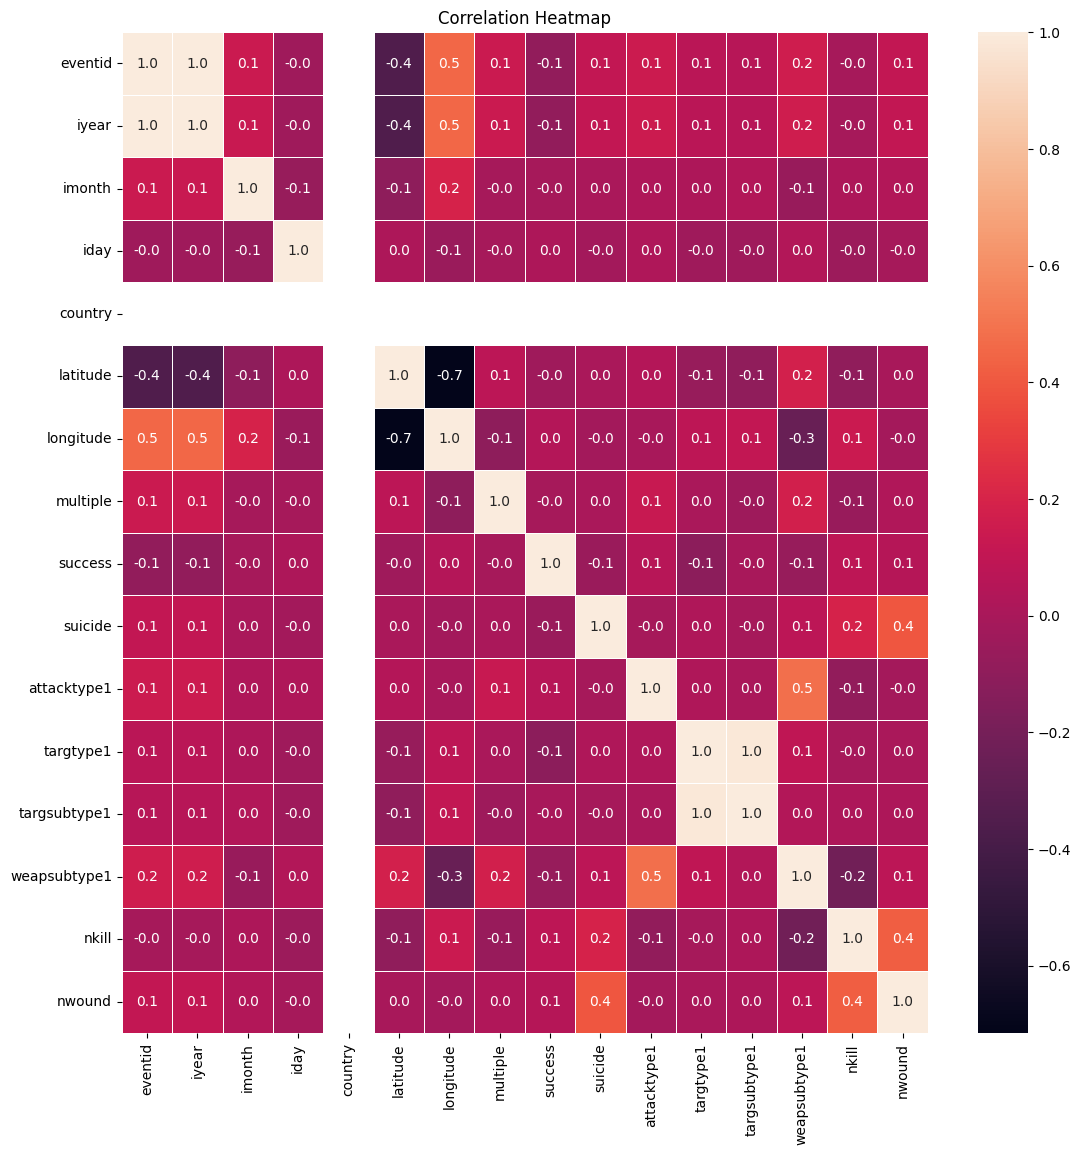

In [33]:
import seaborn as sns

numeric_data = turdata.select_dtypes(include=['number'])

# Step 2: Plot the heatmap
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.title("Correlation Heatmap")
plt.show()

In [34]:
mildata = turdata[turdata.targtype1 == 4]
mildata.head()

,eventid,iyear,imonth,iday,country,country_txt,city,latitude,longitude,multiple,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,weapsubtype1,weapsubtype1_txt,nkill,nwound
486,197008310001,1970,8,31,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Bombing/Explosion,4,Military,29.0,Military Unit/Patrol/Convoy,NaN,16.0,Unknown Explosive Type,0.0,0.0
531,197010020002,1970,10,2,209,Turkey,Izmir,38.395649,27.135641,0.0,...,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,28.0,Dynamite/TNT,0.0,0.0
539,197010060001,1970,10,6,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Armed Assault,4,Military,35.0,Military Transportation/Vehicle (excluding con...,NaN,NaN,NaN,0.0,0.0
575,197010270002,1970,10,27,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,16.0,Unknown Explosive Type,0.0,0.0
644,197012240001,1970,12,24,209,Turkey,Ankara,39.930771,32.767540,0.0,...,Bombing/Explosion,4,Military,NaN,NaN,NaN,16.0,Unknown Explosive Type,0.0,0.0


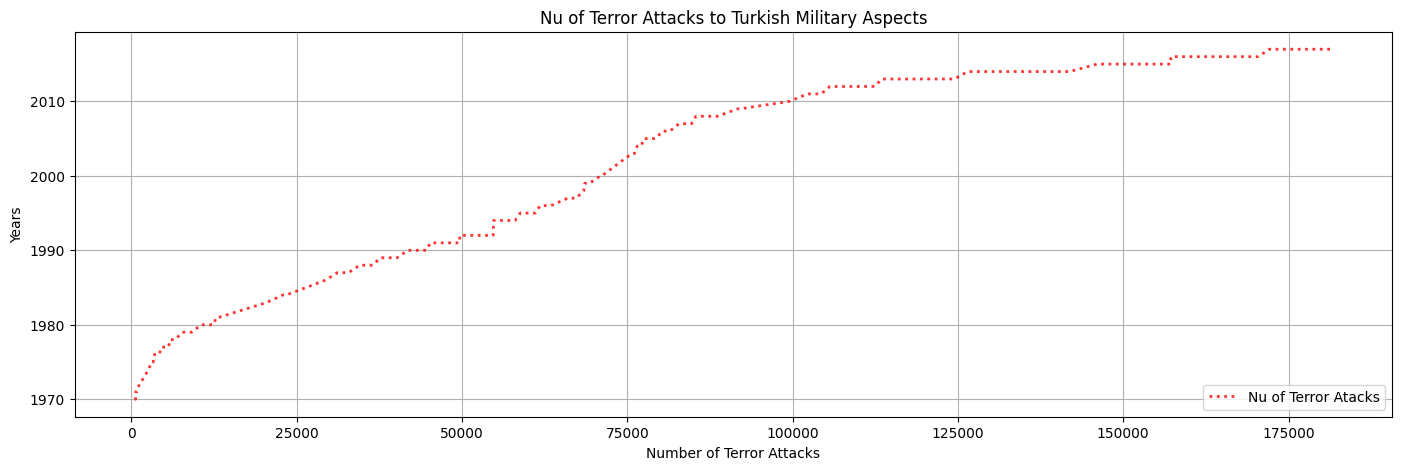

In [35]:
mildata.iyear.plot(kind = 'line', color = 'r', label = 'Nu of Terror Atacks', linewidth = 2, alpha = 0.8, grid = True, linestyle = ':', figsize = (17,5))
plt.legend(loc = 'lower right')
plt.xlabel('Number of Terror Attacks')
plt.ylabel('Years')
plt.title('Nu of Terror Attacks to Turkish Military Aspects')
plt.show()

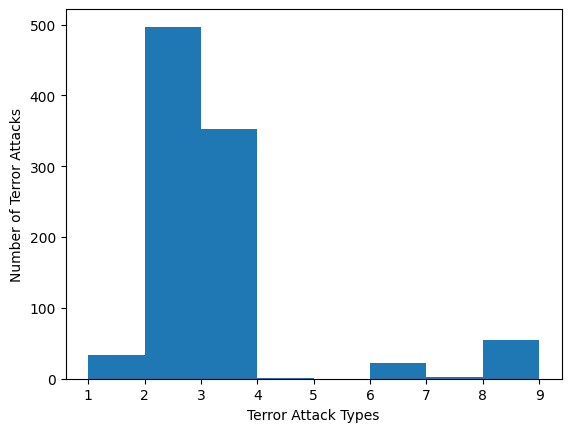

In [36]:
plt.hist(mildata.attacktype1, bins = 8)
plt.xlabel('Terror Attack Types')
plt.ylabel('Number of Terror Attacks')
plt.show()

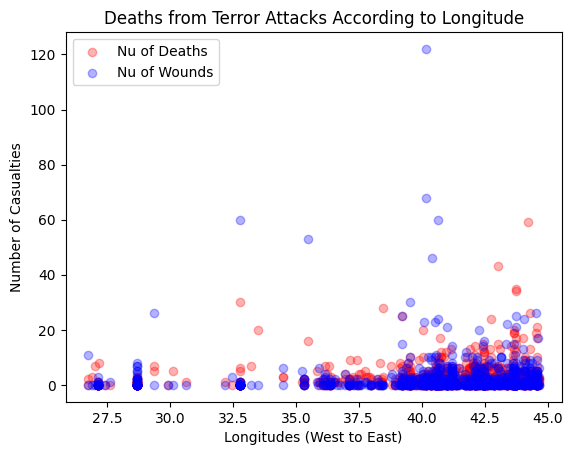

In [38]:
plt.scatter(mildata.longitude, mildata.nkill, color = 'r', alpha = 0.3, label = 'Nu of Deaths')
plt.scatter(mildata.longitude, mildata.nwound, color = 'b', alpha = 0.3, label = 'Nu of Wounds')
plt.xlabel('Longitudes (West to East)')
plt.ylabel('Number of Casualties')
plt.title('Deaths from Terror Attacks According to Longitude')
plt.legend(loc = 'upper left')
plt.show()

In [39]:
# (filtering example) Number of terror attacks by bombs concluded with deaths:
bomb_data = mildata[(mildata['nkill']>=1) & (mildata['attacktype1']==3)]

# Or we can use this code:
#bomb_data = mildata[np.logical_and(mildata['nkill']>=1, mildata['attacktype1']==3)]

print('Number of Terror Attacks Using Bombs Concluded With Deaths:', bomb_data['nkill'].count())
print('Total Number of Deaths:', int(bomb_data['nkill'].sum()))

Number of Terror Attacks Using Bombs Concluded With Deaths: 194
Total Number of Deaths: 589
